# **SPM**

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

## Load Datasets

In [ ]:
# script lettura dataset
df = pd.read_csv('TrainingTSall.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [ ]:
df_test1 = pd.read_csv('ValidateTSall.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [ ]:
df_test2 = pd.read_csv('TestTSall.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df_test1['DateTime'] = pd.to_datetime(df_test1['DateTime'])
df_test2['DateTime'] = pd.to_datetime(df_test2['DateTime'])

## Data Preparation

In [ ]:
df['Weekday']=df['DateTime'].apply(lambda x:x.weekday())
df_test1['Weekday']=df_test1['DateTime'].apply(lambda x:x.weekday())
df_test2['Weekday']=df_test2['DateTime'].apply(lambda x:x.weekday())

df

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend,Weekday
0,2004-05-05 04:00:00,2.15275,867.000000,28.0,41.0,1439.000000,14.700000,0,2
1,2005-01-08 04:00:00,1.20000,972.000000,169.0,88.0,1032.000000,7.900000,1,5
2,2005-01-30 12:00:00,1.00000,890.000000,129.0,92.0,776.000000,7.200000,1,6
3,2004-05-15 02:00:00,1.00000,935.000000,55.0,71.0,1389.000000,17.400000,1,5
4,2004-12-15 19:00:00,3.60000,1099.833166,484.0,137.0,1456.264598,18.317829,0,2
...,...,...,...,...,...,...,...,...,...
5609,2004-08-24 08:00:00,2.30000,1049.000000,216.0,118.0,1662.000000,22.400000,0,1
5610,2004-05-16 10:00:00,2.00000,1053.000000,138.0,105.0,1473.000000,25.500000,1,6
5611,2004-06-01 07:00:00,1.40000,1225.000000,190.0,94.0,1922.000000,16.900000,0,1
5612,2004-11-24 04:00:00,1.40000,1023.000000,295.0,81.0,1195.000000,10.600000,0,2


In [ ]:
day1=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==0].copy()
day2=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==1].copy()
day3=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==2].copy()
day4=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==3].copy()
day5=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==4].copy()
day6=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==5].copy()
day7=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==6].copy()
    
weekdays_train = [day1,day2,day3,day4,day5,day6,day7]

day1_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==0].copy()
day2_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==1].copy()  
day3_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==2].copy()
day4_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==3].copy()
day5_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==4].copy()
day6_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==5].copy()
day7_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==6].copy()
    
weekdays_test1 = [day1_t1,day2_t1,day3_t1,day4_t1,day5_t1,day6_t1,day7_t1]

day1_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==0].copy()
day2_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==1].copy() 
day3_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==2].copy() 
day4_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==3].copy()
day5_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==4].copy()
day6_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==5].copy()
day7_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==6].copy()
    
weekdays_test2 = [day1_t2,day2_t2,day3_t2,day4_t2,day5_t2,day6_t2,day7_t2]

In [ ]:
day_l= []
day0_l=[]
day_t1_l=[]
day_t2_l= []
for day in weekdays_train:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['DateTime'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day0_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True)
        
for day in weekdays_test1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['DateTime'].apply(lambda x: str(x)[11:19])
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day_t1_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) 

for day in weekdays_test2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['DateTime'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True) 
        day_l.append(ts)
        day_t2_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True)

In [ ]:
split = 2 
part_size = 60 // split
day0_split = []
day_t1_split = []
day_t2_split = []

for ts in day0_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i    
        day0_split.append(day_div)
        
for ts in day_t1_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t1_split.append(day_div)
    
for ts in day_t2_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t2_split.append(day_div)

for day in day0_split:
    day.reset_index(drop=True, inplace=True) 
for day in day_t1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_t2_split:
    day.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

NOTA: dato che influenzati dalla presenza di Weekend come abbiamo visto nei classificatori vogliamo usare i valori di CO(GT) per predirre se è orario di ufficio oppure notte

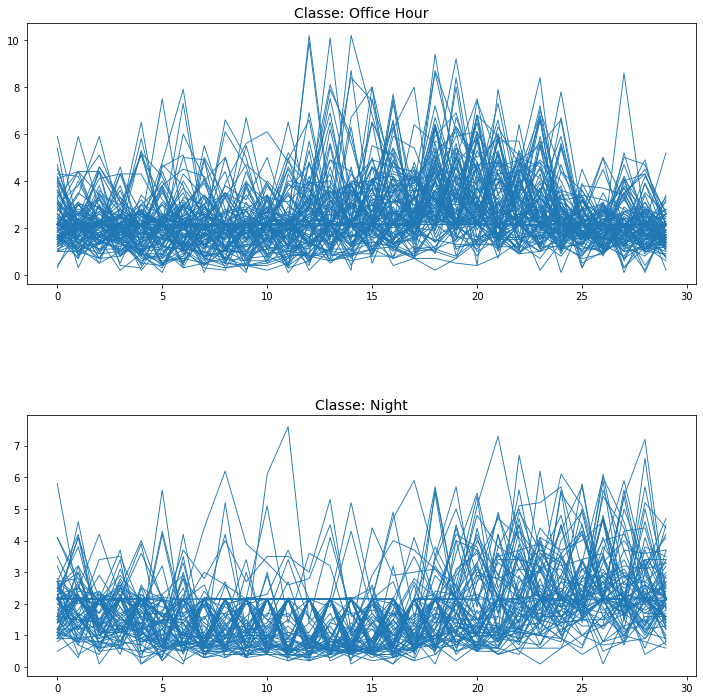

In [ ]:
ts_l= []
ts_arr = []

for i in day0_split:
    ts = i['CO(GT)'].copy()
    ts_l.append(ts)

ts_size = len(day0_split[1])
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))
X_train = np.array(ts_arr)

def divide_day(ts): 
     if ts['DateTime'][ts.index[ts_size//2]].hour <= 19 and ts['DateTime'][ts.index[ts_size//2]].hour >= 7:
        return 'Office Hour'
     else:
        return 'Night'
    
labels = np.array([divide_day(i) for i in day0_split])

y_train = preprocessing.LabelEncoder().fit_transform(labels)

plt.figure(figsize=(12,12))

for i, classe in enumerate(['Office Hour', 'Night']):
    plt.subplot(2, 1, i + 1)
    for x in X_train[labels == classe]:
        plt.plot(x, color='C0',linewidth=0.9)
    plt.title('Classe: {}'.format(classe), fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
ts_l = []
ts_arr = []

for i in day_t1_split:
    ts = i['CO(GT)'].copy()
    ts_l.append(ts)
    ts_size = len(day_t1_split[1])
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))

X_test1 = np.array(ts_arr)
y_test1 = preprocessing.LabelEncoder().fit_transform(labels)

In [ ]:
ts_l = []
ts_arr = []

for i in day_t2_split:
    ts = i['CO(GT)'].copy()
    ts_l.append(ts)
    ts_size = len(day_t2_split[1])
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))
    
X_test2 = np.array(ts_arr)
y_test2 = preprocessing.LabelEncoder().fit_transform(labels)

In [ ]:
y_test1.shape, X_test1.shape

((180,), (56, 30))

In [ ]:
X_train.shape, y_train.shape


((180, 30), (180,))

In [ ]:
X_test2.shape, y_test2.shape


((56, 30), (180,))

Provo a usare X_train come ts

In [ ]:
ts=X_train

In [ ]:
ts

array([[2.5       , 2.        , 2.3       , ..., 2.9       , 2.15274954,
        1.6       ],
       [1.6       , 3.        , 2.2       , ..., 1.3       , 1.9       ,
        1.3       ],
       [1.5       , 2.3       , 0.1       , ..., 1.7       , 2.5       ,
        1.5       ],
       ...,
       [1.5       , 2.        , 2.7       , ..., 1.7       , 1.1       ,
        1.5       ],
       [2.4       , 2.15274954, 1.3       , ..., 2.15274954, 1.4       ,
        2.15274954],
       [0.4       , 1.6       , 2.15274954, ..., 1.9       , 1.        ,
        1.2       ]])

In [ ]:
ts = ts.reshape(180,30,1)

In [ ]:
ts.shape

(180, 30, 1)

In [ ]:
pip install tslearn

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

## TS approximation


In [ ]:
# SAX transform
n_paa_segments = 30
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

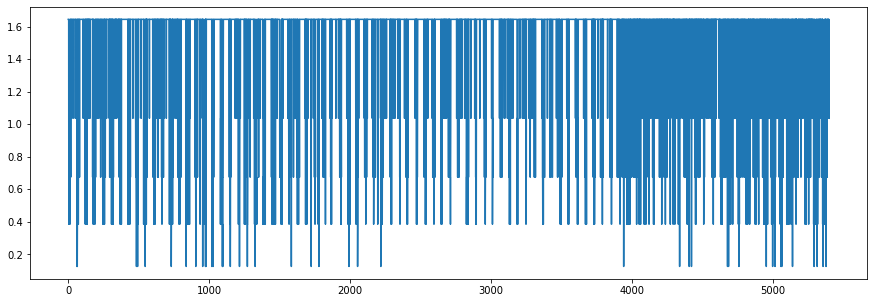

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(sax_ts_inv.ravel())
plt.show()

In [ ]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{0.12566134685507416: 0,
 0.38532046640756773: 1,
 0.6744897501960817: 2,
 1.0364333894937898: 3,
 1.6448536269514722: 4}

In [ ]:
X_seq = list()
for x in sax_ts_inv:
    X_seq.append([map_symbols.get(v, -1) for v in x.ravel()])

In [ ]:
len(X_seq[0])


30

In [ ]:
len(X_seq)

180

## Creating transactional DataSet

### items

dalla sequenza della sax sono stati presi i valori di ogni singolo segmento (items).

In [ ]:
new_seq = []
for x in X_seq:
    new_seq.append(x[0])

In [ ]:
len(new_seq)

180

### elements

ogni 24 items sono stati raccolti in un element , quindi ho 26 elementi

In [ ]:
X_seq2H = []
i = 0
for i in range(0, 180, 4):
    X_seq2H.append((new_seq[i],new_seq[i+1],new_seq[i+2],new_seq[i+3]))

In [ ]:
len(X_seq2H)


45

### Sequence

In [ ]:
X_seqdef = []
i = 0
for i in range(0, 45, 15):
    X_seqdef.append([X_seq2H[i],X_seq2H[i+1],X_seq2H[i+2],
                     X_seq2H[i+3],X_seq2H[i+4],X_seq2H[i+5],
                     X_seq2H[i+6],X_seq2H[i+7],X_seq2H[i+8],
                     X_seq2H[i+9],X_seq2H[i+10],X_seq2H[i+11],X_seq2H[i+12],X_seq2H[i+13],X_seq2H[i+14]])

In [ ]:
len(X_seqdef)


3

## SPM

In [ ]:
pip install prefixspan


In [ ]:
from prefixspan import PrefixSpan


In [ ]:
ps = PrefixSpan(X_seqdef)


### frequenza almeno 2 lunghezza almeno 3

In [ ]:
patterns = ps.frequent(2)
listafreq = []
for idx, i in enumerate(patterns):
    if len(patterns[idx][1])>= 3:
        listafreq.append(i)
len(listafreq)

96

In [ ]:
patterns = ps.frequent(2, closed = True)
listafreq = []
for idx, i in enumerate(patterns):
    if len(patterns[idx][1])>= 3:
        listafreq.append(i)
len(listafreq)

20

In [ ]:
patterns = ps.topk(11, closed = True )
listafreq = []
for idx, i in enumerate(patterns):
    if len(patterns[idx][1])>= 3:
        listafreq.append(i)
listafreq

[(3, [(3, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4)]),
 (3, [(4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4)]),
 (2, [(4, 4, 4, 4), (3, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4)]),
 (2, [(4, 4, 4, 4), (4, 4, 3, 4), (4, 4, 4, 4), (4, 4, 4, 4)]),
 (2, [(4, 4, 4, 4), (4, 4, 3, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4)]),
 (2,
  [(4, 4, 4, 4),
   (4, 4, 3, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 3, 4)]),
 (2,
  [(4, 4, 4, 4),
   (4, 4, 3, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 3, 4),
   (4, 4, 3, 4)]),
 (2,
  [(4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 3, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4)]),
 (2, [(4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 3, 4)]),
 (2,
  [(4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 3, 4),
   (4, 4, 3, 4)])]

### variante closed

In [ ]:
patterns = ps.frequent(2)
listafreq = []
for idx, i in enumerate(patterns):
    if len(patterns[idx][1])>= 3:
        listafreq.append(i)
len(listafreq)

96

In [ ]:
closedpatterns = ps.frequent(2, closed = True)
listafreq = []
for idx, i in enumerate(closedpatterns):
    if len(patterns[idx][1])>= 3:
        listafreq.append(i)
len(listafreq)

20

In [ ]:
closedpatterns = ps.topk(11, closed = True )
listafreq = []
for idx, i in enumerate(patterns):
    if len(patterns[idx][1])>= 3:
        listafreq.append(i)
listafreq

[(2,
  [(4, 4, 4, 4), (3, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4)],
  [(0, 10), (2, 6)]),
 (2,
  [(4, 4, 4, 4), (4, 4, 3, 4), (4, 4, 4, 4), (4, 4, 4, 4)],
  [(0, 4), (1, 6)]),
 (2,
  [(4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 3, 4),
   (4, 4, 3, 4)],
  [(0, 14), (1, 12)]),
 (2,
  [(4, 4, 4, 4),
   (4, 4, 3, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 3, 4),
   (4, 4, 3, 4)],
  [(0, 14), (1, 12)]),
 (2,
  [(4, 4, 4, 4), (4, 4, 3, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4)],
  [(0, 10), (1, 8)]),
 (3,
  [(3, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4)],
  [(0, 10), (1, 6), (2, 6)]),
 (3,
  [(4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4)],
  [(0, 10), (1, 8), (2, 6)]),
 (2,
  [(4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 3, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4),
   (4, 4, 4, 4)],
  [(1, 14), (2, 11)]),
 (2,
  [(4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 4, 4), (4, 4, 3, 4)],